In [59]:
import pandas as pd
import numpy as np
import modular_visualizations as vis
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

DATA_PATH = '/Users/johnpentakalos/Development/islp/data/'

### File Read

In [3]:
college_df = pd.read_csv(DATA_PATH + 'college.csv')
college_df.rename(columns={'Unnamed: 0': 'College'}, inplace=True)
college_df

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### Distributions

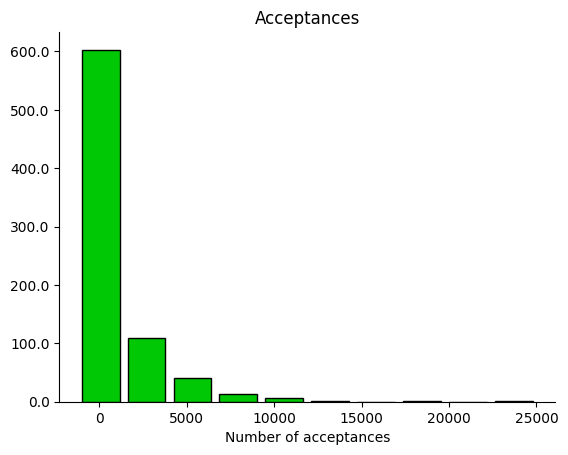

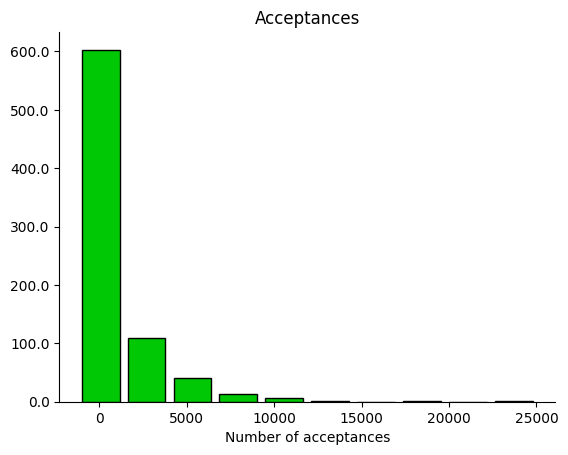

In [4]:
hist_dict = {
    'title': 'Acceptances',
    'xlabel': 'Number of acceptances',
    'format_code': '{x:,}'
}
plot_df = college_df[['College', 'Accept']].copy()
plot_df.columns = ['College', 'y_val']

fig_plt, fig_ax = vis.plot_np_histogram(plot_df, hist_dict)
fig_plt

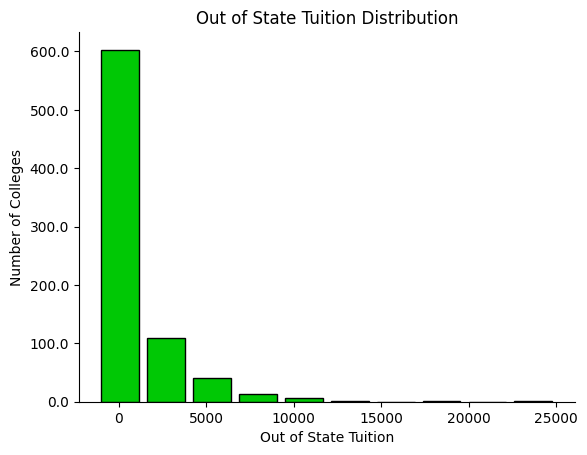

In [5]:
hist_dict = {
    'title': 'Out of State Tuition Distribution',
    'xlabel': 'Out of State Tuition',
    'ylabel': 'Number of Colleges',
    'format_code': '{x:,}'
}
plot_df = college_df[['College', 'Accept']].copy()
plot_df.columns = ['College', 'y_val']

fig_plt, fig_ax = vis.plot_np_histogram(plot_df, hist_dict)
fig_plt

## Auto Dataset

In [48]:
auto_df = pd.read_csv(DATA_PATH + 'auto.csv')
contains_question_mark = auto_df.apply(lambda row: row.str.contains(r'\?', case=False).any(), axis=1)
auto_df = auto_df[~contains_question_mark].copy()
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'])
num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
qual_cols = ['origin', 'name']
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Quantitative predictors: [mpg, cylinders, displacement, horsepower, weight, acceleration, year]
Qualitative predictors: [origin, name]

In [51]:
# auto_df[num_cols].agg(['min', 'max'])
auto_df[num_cols].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [52]:

start = auto_df.iloc[:10]
end = auto_df.iloc[85:]
cut_auto_df = pd.concat([start, end])
cut_auto_df[num_cols].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000
25%,18.000000,4.000000,101.000000,75.000000,2215.000000,14.000000,75.000000
50%,23.900000,4.000000,146.000000,90.000000,2795.000000,15.500000,77.000000
75%,30.500000,6.000000,250.000000,115.000000,3520.000000,17.300000,80.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000


In [54]:
# Check if any column contains a non-numeric value
contains_non_numeric = auto_df[num_cols].applymap(lambda x: not x.isnumeric() if isinstance(x, str) else False).any(axis=1)

# Filter rows with non-numeric values
rows_with_non_numeric = auto_df[contains_non_numeric]

assert len(rows_with_non_numeric) == 0, 'dataframe still contains string values'

/var/folders/_9/6z_jclc94bj2l7x9myghgdsh0000gn/T/ipykernel_86231/2328255806.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_non_numeric = auto_df[num_cols].applymap(lambda x: not x.isnumeric() if isinstance(x, str) else False).any(axis=1)


### Predictors for MPG

In [57]:
for col in num_cols:
    r_coef = np.corrcoef(cut_auto_df.mpg, cut_auto_df[col])[0, 1]
    print(f'Correlation coefficient between {col} and mpg is {r_coef:.2f}')

Correlation coefficient between mpg and mpg is 1.00
Correlation coefficient between cylinders and mpg is -0.77
Correlation coefficient between displacement and mpg is -0.80
Correlation coefficient between horsepower and mpg is -0.77
Correlation coefficient between weight and mpg is -0.83
Correlation coefficient between acceleration and mpg is 0.38
Correlation coefficient between year and mpg is 0.62


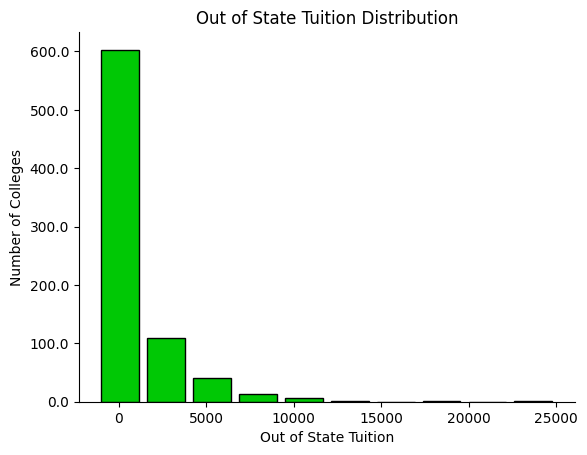

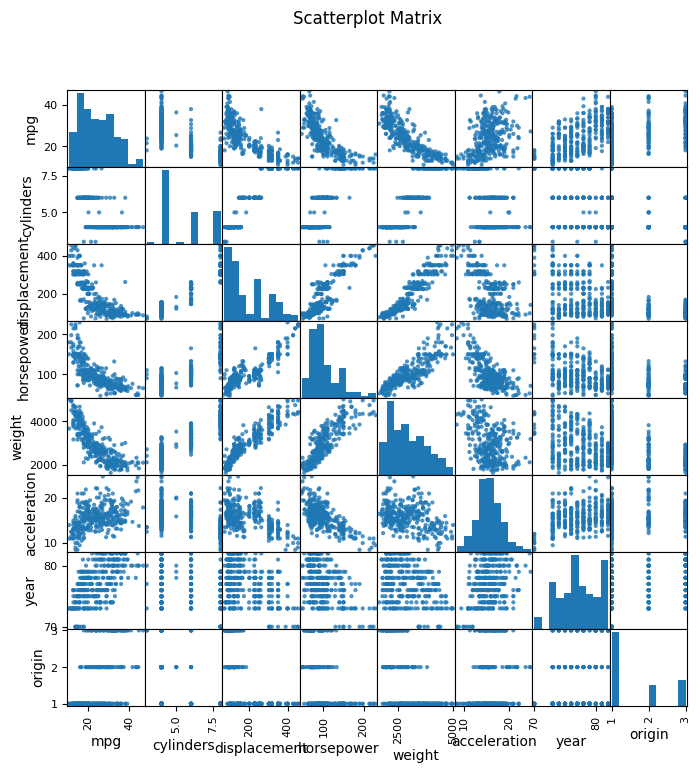

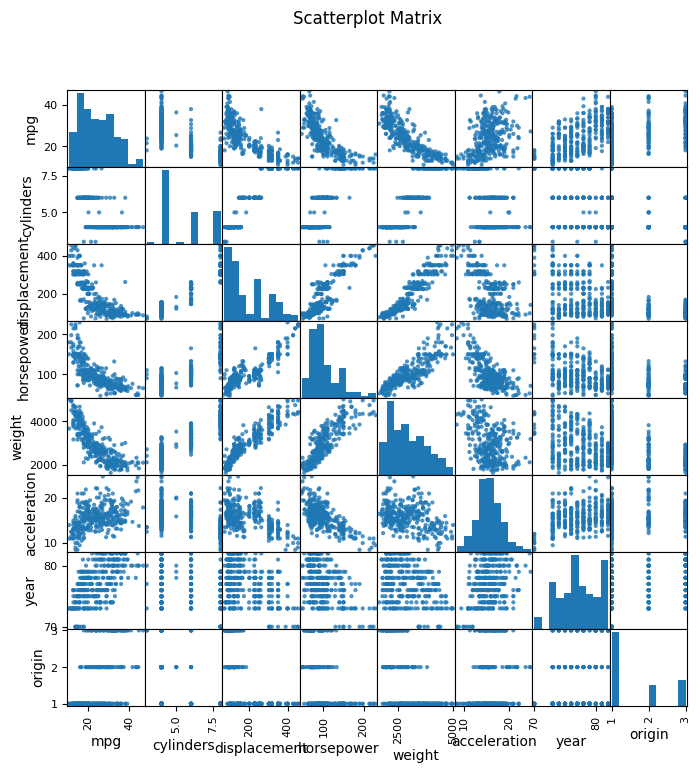

In [61]:
plot_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
plot_df = cut_auto_df[plot_cols]
scatter_matrix(cut_auto_df, alpha=0.8, figsize=(8, 8), diagonal='hist')

# Add a title
plt.suptitle('Scatterplot Matrix')
plt.show()

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: int64